# **Helper**

In [2]:
%pip install numpy pandas scipy matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
from scipy.signal import medfilt, savgol_filter
from typing import List, Union
import matplotlib.pyplot as plt

# **Filter**

In [4]:
Number = Union[int, float]

def hampel_filter(data_list: List[Number], 
                   window_size: int = 5, 
                   n_sigmas: float = 3.0) -> List[Number]:
    if window_size % 2 == 0:
        window_size += 1
        
    data_series = pd.Series(data_list)
    
    rolling_median = data_series.rolling(window=window_size, center=True, min_periods=1).median()
    
    k = 1.4826
    abs_diff = (data_series - rolling_median).abs()
    rolling_mad = k * abs_diff.rolling(window=window_size, center=True, min_periods=1).median()
    
    is_outlier = abs_diff > (n_sigmas * rolling_mad)
    
    corrected_series = data_series.copy()
    corrected_series[is_outlier] = rolling_median[is_outlier]
    
    return corrected_series.tolist()


def median_filter(data_list: List[Number], 
                  kernel_size: int = 3) -> List[Number]:
    if kernel_size % 2 == 0:
        kernel_size += 1
        
    filtered_data = medfilt(np.array(data_list), kernel_size=kernel_size)
    
    return filtered_data.tolist()


def moving_average_filter(data_list: List[Number], 
                          window_size: int = 3) -> List[Number]:
    data_series = pd.Series(data_list)
    
    rolling_mean = data_series.rolling(window=window_size, center=True, min_periods=1).mean()
    
    return rolling_mean.tolist()

def manual_filter(data_list: List[Number]) -> List[Number]:
    filtered_list = [item for item in data_list if 7 <= item <= 9]
    return filtered_list


def savitzky_golay_filter(data_list: List[Number], 
                          window_length: int = 5, 
                          polyorder: int = 2) -> List[Number]:
    if window_length % 2 == 0:
        window_length += 1 
        
    if polyorder >= window_length:
        polyorder = window_length - 1
        print(f"Warning: polyorder ถูกปรับเป็น {polyorder} เนื่องจากต้องน้อยกว่า window_length")

    try:
        filtered_data = savgol_filter(data_list, window_length, polyorder)
        return filtered_data.tolist()
    except ValueError as e:
        print(f"Error S-G Filter: {e}. กรุณาตรวจสอบค่า window_length และ polyorder")
        return data_list

# **Dataset**

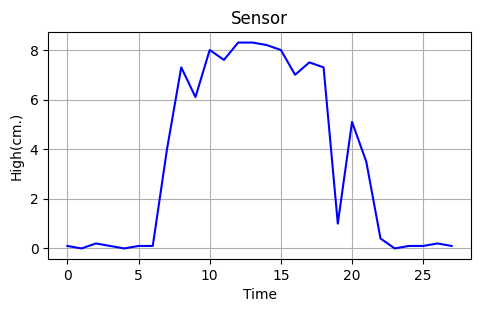

In [5]:
datatest = [0.1,0,0.2,0.1,0,0.1,0.1,4,7.3,6.1,8,7.6,8.3,8.3,8.2,8,7,7.5,7.3,1,5.1,3.5,0.4,0,0.1,0.1,0.2,0.1]
x_axis_test = range(len(datatest))

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(x_axis_test, datatest, color='blue')
plt.title(f"Sensor")
plt.xlabel('Time')
plt.ylabel('High(cm.)')
plt.grid(True)

In [6]:
data1 = [3.70,6.30,7.00,7.00,6.40,6.30,6.40,6.40,6.30,6.50,6.80,6.00,3.50,1.10]
data2 = [0.80,0.70,0.70,0.80,0.30,0.40,0.70,0.60,0.70,0.60,0.60,0.60,0.70,0.70,0.70,0.70,0.60,0.60,0.60,0.70,0.60,0.70,0.90,0.60,0.60,0.80,0.50,0.60,0.70,0.90,0.80,0.50,0.60,0.90,0.50,0.60,1.00,0.70,0.80,0.80,0.90,0.70,0.70,0.80,0.70,0.70,0.70,0.60,0.70,0.50,1.00,0.90,0.80,0.90,0.90,0.70,0.80,0.70,0.80,0.80,0.60,0.60,4.60,6.70,7.20,6.40,6.40,6.60,6.30,6.30,6.20,6.40,6.60,5.60,3.50,1.20,1.30,0.60,0.20,0.30,0.40,0.30,0.20,0.30,0.40]
data3 = [0.90,0.60,0.50,0.70,0.60,0.70,0.40,0.90,0.90,0.70,0.60,0.70,0.40,0.70,0.80,0.80,0.80,0.60,0.60,0.70,0.60,0.70,0.70,0.80,0.60,0.60,0.90,0.80,0.80,0.90,0.30,0.90,0.80,0.60,0.40,0.80,1.10,4.90,6.70,7.00,6.80,6.50,6.40,6.50,6.40,6.30,6.70,6.60,5.10,2.90,0.90,0.80,0.30,0.20,0.40,0.30,0.20,0.30,0.40]
data4 = [1.00,0.90,0.50,0.80,0.60,0.40,0.40,0.50,0.30,0.50,0.50,0.60,0.70,0.70,0.70,0.60,0.70,0.60,0.80,0.60,0.50,0.60,0.70,0.60,0.60,0.60,0.70,0.80,0.60,0.60,0.80,0.60,0.80,0.80,1.30,4.80,6.90,7.00,6.40,6.50,6.60,6.60,6.40,6.40,6.70,6.70,5.40,3.90,1.20,1.00,0.40,0.30,0.50,0.40,0.30,0.40,0.50]
data5 = [0.60,1.00,0.70,0.70,0.80,0.80,0.80,0.80,0.70,0.90,0.80,0.60,0.80,0.50,0.80,0.60,0.60,0.70,0.60,0.50,0.80,0.60,0.80,0.70,0.60,0.60,0.60,0.90,0.70,0.60,0.60,0.80,0.40,0.70,0.50,0.50,0.50,0.30,0.70,0.30,0.70,0.40,0.50,0.60,0.90,0.70,0.80,0.50,0.80,0.40,3.10,6.10,7.00,6.50,6.40,6.40,6.10,6.50,6.10,6.50,6.80,6.20,4.00,2.20,0.60]
data6 = [0.60,0.50,0.80,0.80,0.80,0.80,0.90,0.80,0.80,0.70,0.80,0.60,0.50,0.60,0.70,0.80,0.70,0.90,0.90,0.80,0.80,0.90,0.20,4.70,6.70,7.10,6.70,6.30,6.30,6.30,6.10,6.40,6.60,6.60,5.80,3.80,1.50,0.80,0.40,0.30,0.50,0.40,0.30,0.40,0.50]
data7 = [0.60,0.80,0.70,0.80,0.70,0.80,0.80,0.70,0.50,0.60,0.70,0.50,0.80,0.70,0.80,0.80,0.60,0.60,0.90,1.00,0.70,0.80,0.60,0.80,0.70,0.60,0.80,0.80,0.80,0.90,0.60,0.30,0.40,0.60,0.40,0.50,0.60,0.10,0.50,0.70,0.00,4.10,6.20,7.20,7.20,6.70,6.40,6.50,6.20,6.30,6.50,6.80,5.90,3.80,1.80,0.80,0.50,0.30,0.20,0.40,0.30,0.20,0.30,0.40]
data8 = [0.80,0.70,0.60,0.60,0.50,0.60,0.70,0.70,0.40,0.80,0.60,1.00,0.70,0.60,0.40,0.90,0.80,0.50,0.50,0.80,0.50,0.60,0.80,0.80,0.60,0.80,0.80,0.60,0.90,0.90,0.70,0.80,0.90,0.80,0.60,0.70,1.00,0.70,0.80,0.80,0.70,0.90,0.90,4.90,7.10,7.10,6.40,6.50,6.30,6.40,6.50,6.00,6.40,6.60,5.50,3.60,0.60,0.40,0.20,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data9 = [1.30,0.70,0.70,0.90,0.90,0.80,0.70,0.70,0.80,0.70,0.30,0.70,0.70,0.80,0.60,0.50,0.60,0.80,0.50,0.60,0.90,0.80,0.80,0.90,0.70,0.60,0.70,1.00,0.80,0.60,0.70,0.70,0.50,0.70,0.70,0.70,0.90,0.60,0.80,0.80,0.50,0.50,0.50,0.90,0.70,0.90,0.90,0.70,1.80,5.40,6.80,7.20,6.50,6.60,6.60,6.40,6.40,6.30,6.50,6.60,5.00,3.20,0.40,0.30,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data10 = [1.30,0.90,0.70,0.60,0.60,0.70,0.70,0.50,0.70,0.70,0.80,0.80,0.60,0.50,0.40,0.70,0.50,0.60,0.50,0.40,0.50,0.40,0.90,0.60,0.70,0.70,0.60,0.60,0.80,0.60,0.60,0.70,0.50,0.60,0.50,0.40,0.80,0.50,0.70,0.70,0.60,0.60,0.80,0.60,0.70,0.70,0.60,0.50,0.80,0.60,1.50,5.30,6.70,7.30,6.50,6.60,6.40,6.40,6.20,6.70,6.50,6.90,4.60,2.60,0.30,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data11 = [0.90,0.70,0.60,0.80,0.60,0.60,0.80,0.70,0.80,0.60,1.00,0.70,0.70,0.70,0.60,0.80,0.70,0.70,0.70,0.90,0.60,0.60,0.80,0.70,0.80,0.60,0.70,0.50,0.70,0.70,0.80,0.80,0.70,0.50,0.70,0.70,0.80,0.50,0.80,0.60,0.60,0.60,0.80,0.80,0.70,0.60,0.90,0.70,1.10,1.00,0.70,0.80,0.70,2.00,5.50,6.90,7.00,6.20,6.30,6.40,6.20,6.10,6.40,6.50,6.40,4.90,2.70,0.10,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data12 = [1.10,0.80,0.50,0.70,0.60,0.90,0.70,0.70,0.70,0.80,0.70,0.50,0.60,0.50,0.60,0.80,0.70,0.60,0.70,0.40,0.70,0.70,0.60,0.70,0.70,0.60,0.80,0.90,1.00,0.70,0.80,0.80,0.60,0.30,0.40,0.70,0.60,0.80,0.50,0.40,0.40,0.60,0.20,0.70,0.60,0.70,0.80,0.90,4.60,6.80,7.00,6.40,6.30,6.60,6.20,6.50,6.40,6.50,6.60,5.30,3.40,0.60,0.30,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data13 = [0.80,0.70,0.60,0.80,0.40,0.80,1.10,0.70,0.60,0.80,0.60,0.70,0.60,0.80,0.80,0.60,0.60,0.80,0.70,0.70,0.80,0.40,0.80,0.60,0.70,0.30,0.70,0.80,0.70,0.80,1.00,0.70,0.70,0.80,0.60,0.70,0.60,0.70,0.70,0.70,0.90,0.90,1.00,0.80,0.90,0.60,0.80,2.60,5.40,6.90,7.00,6.70,6.40,6.30,6.40,6.30,6.30,6.40,6.40,4.50,2.50,0.10,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data14 = [1.00,0.90,0.90,1.00,0.50,0.60,0.90,0.90,0.70,0.60,0.60,0.70,0.60,0.80,0.70,0.80,0.50,0.50,0.80,0.70,0.80,0.60,0.60,0.80,0.70,0.60,0.90,0.70,0.80,0.90,0.70,0.70,0.60,0.90,0.60,0.60,0.60,0.90,0.80,0.80,0.90,0.80,1.00,0.70,0.70,0.40,0.60,0.70,0.50,0.60,1.40,5.20,7.00,7.00,6.30,6.40,6.40,6.50,6.10,6.30,6.80,6.80,5.20,3.10,1.00,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data15 = [0.90,0.60,0.70,0.50,0.60,0.50,0.70,0.30,0.60,0.50,0.40,0.70,0.60,0.80,0.90,0.90,0.80,0.70,0.60,0.60,0.50,0.70,0.60,0.60,0.60,0.70,0.80,0.70,0.60,0.80,1.00,0.60,0.70,0.70,0.80,0.60,0.60,0.70,0.80,0.80,0.60,0.70,0.90,0.80,0.10,3.50,6.50,7.00,6.90,6.40,6.20,6.20,6.10,6.30,6.50,6.90,5.70,4.30,1.60,0.80,0.30,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data16 = [1.00,0.90,0.70,0.80,0.70,0.80,0.50,0.70,0.60,0.50,0.90,0.70,1.10,0.70,0.60,0.80,0.90,0.70,0.70,0.80,0.70,1.00,0.80,0.70,0.70,0.70,0.80,0.80,0.80,0.70,0.60,0.90,0.90,0.70,0.50,0.70,0.50,0.60,0.50,0.80,0.70,0.70,0.70,0.70,0.70,0.70,1.20,4.70,6.80,6.90,6.50,6.30,6.30,6.30,6.50,6.50,6.40,6.80,5.20,3.60,0.80,0.40,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data17 = [0.90,1.00,0.80,0.60,0.90,0.60,0.70,0.80,0.30,0.50,0.60,0.60,0.50,0.70,0.50,0.80,0.70,0.60,0.70,0.80,0.60,0.90,0.60,0.70,0.60,0.40,0.50,0.70,0.80,0.40,0.60,0.90,0.70,0.60,0.70,1.00,0.60,0.60,0.40,3.10,5.50,6.90,6.90,6.50,6.50,6.40,6.40,6.40,6.30,6.50,6.60,4.50,2.20,0.00,0.10,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data18 = [1.10,0.70,0.70,0.60,0.90,0.70,0.60,0.80,0.60,0.60,0.80,0.40,0.60,0.60,0.80,0.60,0.90,0.70,0.80,0.60,0.90,0.50,0.50,0.80,0.70,0.50,0.60,0.50,0.80,0.80,0.70,0.80,0.80,0.80,0.60,0.80,0.90,0.60,0.70,0.50,3.70,6.20,7.00,6.90,6.50,6.50,6.40,6.00,6.60,6.60,6.70,6.10,4.20,2.00,0.90,0.30,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data19 = [0.90,0.90,0.90,0.70,0.70,0.90,0.80,0.60,0.60,0.70,0.60,0.50,0.90,0.60,0.80,0.70,0.80,0.80,0.80,1.00,0.70,0.60,0.80,0.90,0.50,0.50,0.60,0.70,0.50,1.00,0.60,0.90,0.60,1.00,0.90,0.60,0.50,0.90,0.70,0.60,0.60,0.50,4.40,6.70,7.10,6.50,6.60,6.60,6.50,6.30,6.20,6.50,6.80,5.70,3.70,1.50,1.00,0.30,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data20 = [1.10,0.70,0.60,0.80,0.80,0.80,0.70,0.60,0.70,0.80,0.60,0.60,0.60,0.70,0.80,0.60,0.60,0.70,0.80,0.70,0.60,0.50,0.80,0.60,0.70,0.90,0.60,0.90,0.20,0.50,0.80,0.50,0.50,0.60,0.40,0.50,0.70,0.50,0.60,0.60,0.60,0.50,3.20,6.20,7.20,6.80,6.80,6.60,6.50,6.20,6.30,6.40,6.70,6.00,4.20,2.00,1.00,0.40,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data21 = [0.80,0.70,0.50,0.80,0.50,0.80,0.80,0.70,0.70,0.70,0.90,0.80,0.80,0.80,0.40,0.50,0.60,0.90,0.90,0.50,0.70,0.50,0.50,0.70,0.70,1.00,0.50,0.90,0.60,0.90,0.60,0.80,0.80,0.60,0.90,0.60,0.70,0.80,0.70,0.70,1.00,0.70,0.70,0.60,0.60,5.00,6.70,7.00,6.40,6.50,6.40,6.30,6.20,6.30,6.40,6.80,5.50,3.60,0.90,0.40,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data22 = [0.90,0.80,0.70,0.70,0.70,0.80,0.80,0.60,0.70,0.80,0.70,0.70,0.50,0.70,0.80,0.60,0.70,0.90,0.80,0.60,0.80,0.50,0.60,0.80,0.60,0.60,0.50,0.70,0.60,0.80,0.80,0.70,1.00,0.80,0.50,0.70,0.50,2.50,5.70,7.10,7.10,6.50,6.50,6.50,6.40,6.50,6.60,6.60,6.30,4.70,2.40,0.30,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data23 = [0.70,0.80,0.60,0.80,0.90,0.40,0.70,0.80,0.70,0.50,0.80,0.90,0.80,0.80,0.70,0.90,0.30,0.30,0.50,0.60,0.80,0.50,0.50,0.40,0.70,0.30,0.40,0.50,0.60,0.80,0.80,0.80,0.80,0.60,0.60,0.70,2.90,5.90,7.00,6.80,6.40,6.70,6.20,6.20,6.40,6.30,6.60,6.40,4.70,2.60,0.00,0.10,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data24 = [0.70,0.60,0.50,0.80,0.80,0.60,0.50,0.60,0.70,0.80,0.70,0.80,0.70,0.60,0.50,0.70,0.80,0.60,0.60,0.80,0.80,0.80,0.80,0.70,0.90,0.90,0.70,0.80,0.80,0.80,0.90,0.90,0.80,0.80,0.60,0.90,0.70,0.60,0.70,1.00,0.10,3.70,6.30,7.00,6.80,6.30,6.60,6.20,6.20,6.50,6.50,6.70,6.00,3.60,1.30,1.10,1.00,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data25 = [1.00,0.70,0.90,0.80,0.70,0.50,0.60,0.50,0.80,0.70,0.80,0.70,0.60,0.50,0.70,0.80,0.90,0.60,0.80,0.80,0.80,0.70,0.80,0.50,0.60,0.70,0.50,0.90,0.70,0.60,0.80,0.90,0.80,0.80,0.70,0.10,4.10,6.30,7.10,6.90,6.50,6.60,6.40,6.50,6.60,6.40,6.60,6.00,3.70,2.00,0.70,0.30,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data26 = [0.90,0.80,0.60,0.70,0.60,0.60,0.70,0.80,0.70,0.70,0.70,0.70,0.60,0.50,0.50,0.90,0.50,0.70,0.20,0.50,0.80,0.30,0.60,0.40,0.40,0.80,0.60,0.60,0.50,0.70,0.60,0.50,1.00,0.50,0.50,0.40,0.50,3.20,6.00,6.80,6.90,6.50,6.60,6.30,6.30,6.20,6.40,6.50,6.80,5.00,2.90,0.50,0.20,0.10,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data27 = [1.60,0.90,0.80,0.60,0.60,0.60,0.60,0.70,0.60,0.40,0.80,0.80,0.40,0.50,0.70,0.60,0.90,0.60,0.90,0.60,0.60,0.80,0.90,0.90,0.50,0.80,0.50,0.50,0.70,0.60,0.80,0.50,0.80,0.80,1.00,0.80,0.70,0.70,0.70,0.80,0.90,1.00,0.80,1.00,0.70,0.50,4.40,6.50,7.00,6.50,6.30,6.40,6.10,6.30,6.50,6.40,6.60,5.90,4.00,1.60,1.10,0.80,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data28 = [0.80,0.60,0.80,0.90,0.80,0.80,0.90,0.60,0.90,0.70,0.80,0.90,0.80,0.60,0.80,0.70,0.90,0.70,0.80,0.70,0.70,1.00,0.70,0.50,0.80,1.00,0.50,0.70,0.70,1.00,0.60,0.60,0.80,0.70,0.90,0.80,0.80,0.50,0.90,0.70,0.60,0.50,4.70,6.30,6.90,6.80,6.60,6.40,6.50,6.10,6.30,6.40,6.70,5.50,3.00,1.20,0.80,0.30,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data29 = [0.70,0.60,0.50,0.60,0.50,0.50,0.50,0.60,0.60,0.40,0.40,0.60,0.90,0.70,0.90,1.00,0.90,0.90,1.00,0.50,0.80,0.70,0.60,0.70,0.70,0.60,0.80,0.60,0.80,0.70,0.70,0.50,0.60,0.50,0.80,0.70,0.80,0.50,0.70,0.70,0.70,0.60,0.90,0.60,4.30,6.50,7.10,6.70,6.40,6.60,6.30,6.30,6.40,6.40,6.70,5.70,3.70,1.10,1.10,0.80,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]
data30 = [0.60,0.70,0.80,0.60,0.90,0.70,0.80,0.50,0.80,0.90,0.90,0.60,0.60,0.70,0.70,0.80,0.70,0.60,0.90,0.70,0.80,0.90,0.70,0.80,0.90,0.50,0.80,0.70,0.60,0.60,0.90,0.80,0.80,0.80,0.70,0.60,0.80,0.70,0.50,0.80,0.40,0.70,0.70,0.70,0.90,0.90,0.70,0.90,0.30,3.90,6.10,6.90,6.90,6.30,6.40,6.20,6.20,6.50,6.30,6.70,6.00,3.80,1.50,0.90,0.40,0.20,0.10,0.10,0.20,0.30,0.20,0.10,0.20,0.30]

In [7]:
data = [data1,data2,data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16, data17, data18, data19, data20, data21, data22, data23, data24, data25, data26, data27, data28, data29, data30]
# remove all values < 0.9 in each sublist (safe, no in-place removal while iterating)
data = [[v for v in lst if v >= 0.9] for lst in data]
# write filtered lists back to original variables so later cells use them
(data1, data2, data3, data4, data5, data6, data7, data8, data9, data10,
 data11, data12, data13, data14, data15, data16, data17, data18, data19, data20,
 data21, data22, data23, data24, data25, data26, data27, data28, data29, data30) = data
print(data)

[[3.7, 6.3, 7.0, 7.0, 6.4, 6.3, 6.4, 6.4, 6.3, 6.5, 6.8, 6.0, 3.5, 1.1], [0.9, 0.9, 0.9, 1.0, 0.9, 1.0, 0.9, 0.9, 0.9, 4.6, 6.7, 7.2, 6.4, 6.4, 6.6, 6.3, 6.3, 6.2, 6.4, 6.6, 5.6, 3.5, 1.2, 1.3], [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.1, 4.9, 6.7, 7.0, 6.8, 6.5, 6.4, 6.5, 6.4, 6.3, 6.7, 6.6, 5.1, 2.9, 0.9], [1.0, 0.9, 1.3, 4.8, 6.9, 7.0, 6.4, 6.5, 6.6, 6.6, 6.4, 6.4, 6.7, 6.7, 5.4, 3.9, 1.2, 1.0], [1.0, 0.9, 0.9, 0.9, 3.1, 6.1, 7.0, 6.5, 6.4, 6.4, 6.1, 6.5, 6.1, 6.5, 6.8, 6.2, 4.0, 2.2], [0.9, 0.9, 0.9, 0.9, 4.7, 6.7, 7.1, 6.7, 6.3, 6.3, 6.3, 6.1, 6.4, 6.6, 6.6, 5.8, 3.8, 1.5], [0.9, 1.0, 0.9, 4.1, 6.2, 7.2, 7.2, 6.7, 6.4, 6.5, 6.2, 6.3, 6.5, 6.8, 5.9, 3.8, 1.8], [1.0, 0.9, 0.9, 0.9, 0.9, 1.0, 0.9, 0.9, 4.9, 7.1, 7.1, 6.4, 6.5, 6.3, 6.4, 6.5, 6.0, 6.4, 6.6, 5.5, 3.6], [1.3, 0.9, 0.9, 0.9, 0.9, 1.0, 0.9, 0.9, 0.9, 0.9, 1.8, 5.4, 6.8, 7.2, 6.5, 6.6, 6.6, 6.4, 6.4, 6.3, 6.5, 6.6, 5.0, 3.2], [1.3, 0.9, 0.9, 1.5, 5.3, 6.7, 7.3, 6.5, 6.6, 6.4, 6.4, 6.2, 6.7, 6.5, 6.9, 4.6, 2.6], [0.9, 1.0, 0.9, 0.9

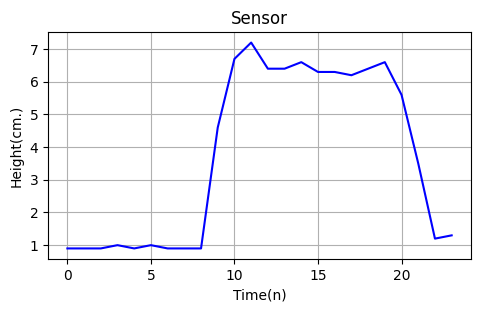

In [8]:
x_axis_test = range(len(data2))

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(x_axis_test, data2, color='blue')
plt.title(f"Sensor")
plt.xlabel('Time(n)')
plt.ylabel('Height(cm.)')
plt.grid(True)

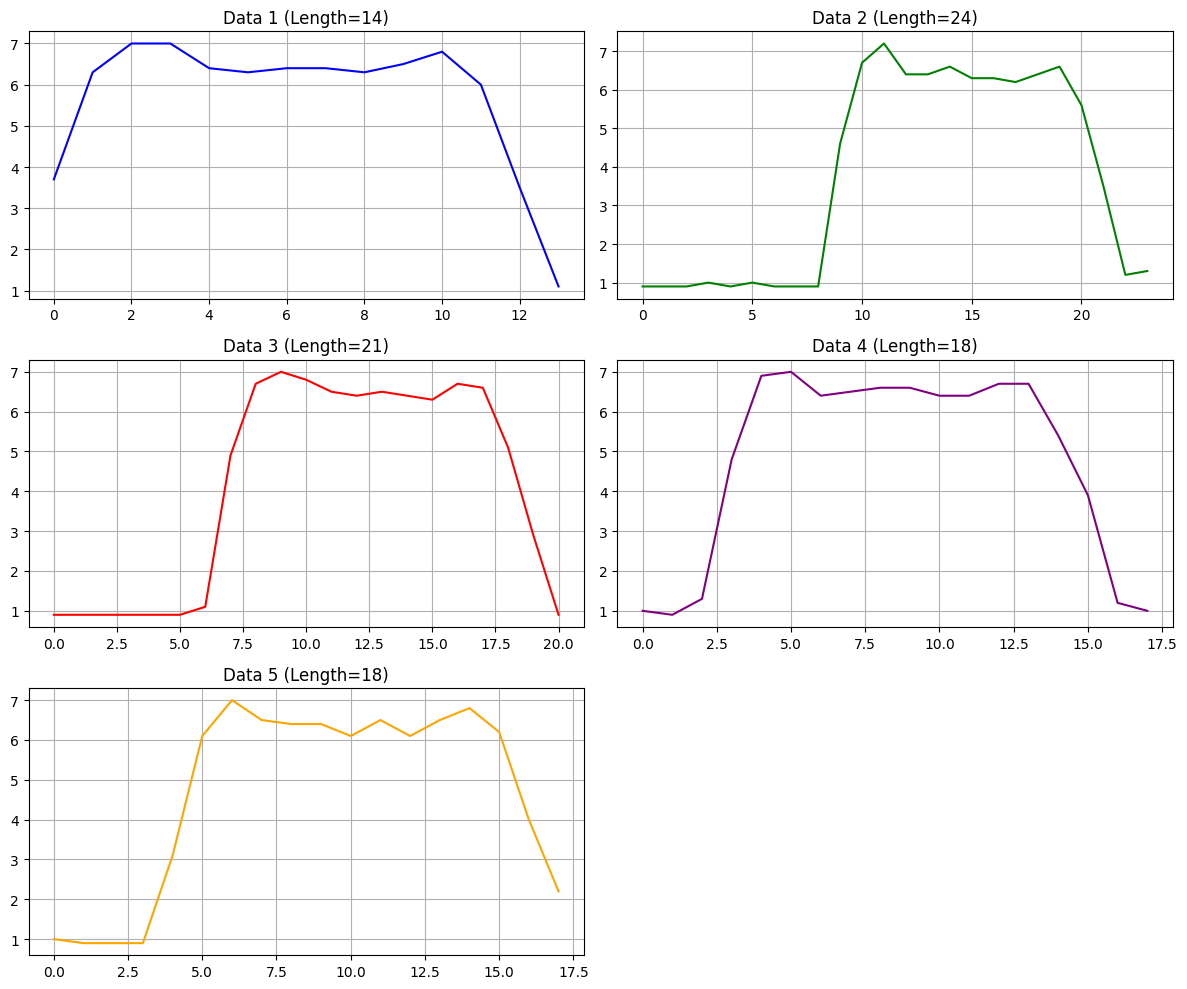

In [9]:
x_axis1 = range(len(data1))
x_axis2 = range(len(data2))
x_axis3 = range(len(data3))
x_axis4 = range(len(data4))
x_axis5 = range(len(data5))

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(x_axis1, data1, color='blue')
plt.title(f"Data 1 (Length={len(data1)})")
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(x_axis2, data2, color='green')
plt.title(f"Data 2 (Length={len(data2)})")
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(x_axis3, data3, color='red')
plt.title(f"Data 3 (Length={len(data3)})")
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(x_axis4, data4, color='purple')
plt.title(f"Data 4 (Length={len(data4)})")
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(x_axis5, data5, color='orange')
plt.title(f"Data 5 (Length={len(data5)})")
plt.grid(True)

plt.tight_layout()
plt.show()

# **Algorithm**

## Algorithm 1

In [10]:
algo1_1 = savitzky_golay_filter(hampel_filter(data1))
algo1_2 = savitzky_golay_filter(hampel_filter(data2))
algo1_3 = savitzky_golay_filter(hampel_filter(data3))
algo1_4 = savitzky_golay_filter(hampel_filter(data4))
algo1_5 = savitzky_golay_filter(hampel_filter(data5))
algo1_6 = savitzky_golay_filter(hampel_filter(data6))
algo1_7 = savitzky_golay_filter(hampel_filter(data7))
algo1_8 = savitzky_golay_filter(hampel_filter(data8))
algo1_9 = savitzky_golay_filter(hampel_filter(data9))
algo1_10 = savitzky_golay_filter(hampel_filter(data10))
algo1_11 = savitzky_golay_filter(hampel_filter(data11))
algo1_12 = savitzky_golay_filter(hampel_filter(data12))
algo1_13 = savitzky_golay_filter(hampel_filter(data13))
algo1_14 = savitzky_golay_filter(hampel_filter(data14))
algo1_15 = savitzky_golay_filter(hampel_filter(data15))
algo1_16 = savitzky_golay_filter(hampel_filter(data16))
algo1_17 = savitzky_golay_filter(hampel_filter(data17))
algo1_18 = savitzky_golay_filter(hampel_filter(data18))
algo1_19 = savitzky_golay_filter(hampel_filter(data19))
algo1_20 = savitzky_golay_filter(hampel_filter(data20))
algo1_21 = savitzky_golay_filter(hampel_filter(data21))
algo1_22 = savitzky_golay_filter(hampel_filter(data22))
algo1_23 = savitzky_golay_filter(hampel_filter(data23))
algo1_24 = savitzky_golay_filter(hampel_filter(data24))
algo1_25 = savitzky_golay_filter(hampel_filter(data25))
algo1_26 = savitzky_golay_filter(hampel_filter(data26))
algo1_27 = savitzky_golay_filter(hampel_filter(data27))
algo1_28 = savitzky_golay_filter(hampel_filter(data28))
algo1_29 = savitzky_golay_filter(hampel_filter(data29))
algo1_30 = savitzky_golay_filter(hampel_filter(data30))
print(algo1_1)

[3.845714285714281, 5.977142857142853, 7.094285714285711, 6.905714285714282, 6.55428571428571, 6.348571428571425, 6.408571428571425, 6.357142857142852, 6.394285714285711, 6.41428571428571, 6.505714285714282, 5.622857142857139, 3.791428571428567, 1.017142857142856]


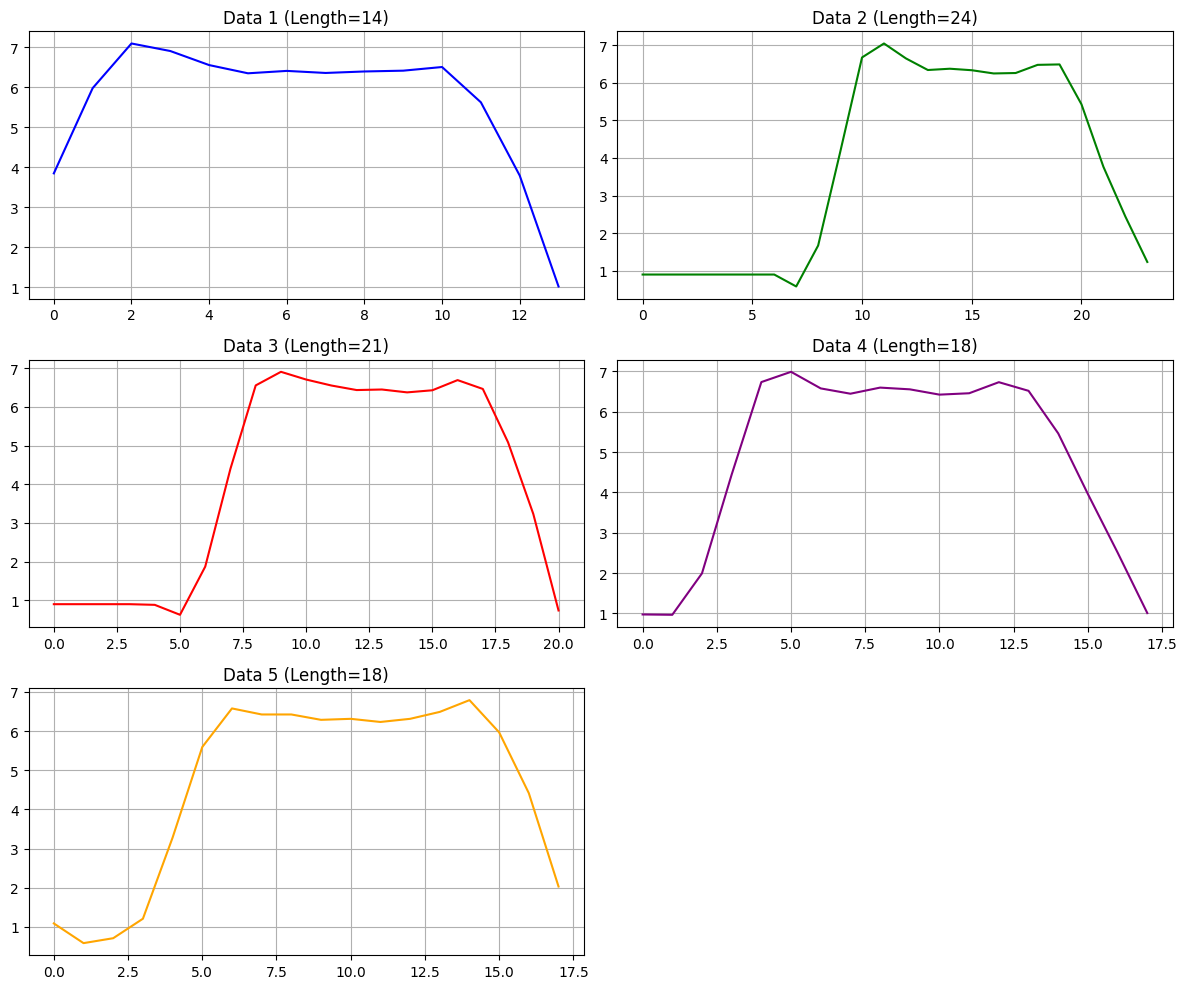

In [11]:
x_axis1 = range(len(algo1_1))
x_axis2 = range(len(algo1_2))
x_axis3 = range(len(algo1_3))
x_axis4 = range(len(algo1_4))
x_axis5 = range(len(algo1_5))

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(x_axis1, algo1_1, color='blue')
plt.title(f"Data 1 (Length={len(algo1_1)})")
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(x_axis2, algo1_2, color='green')
plt.title(f"Data 2 (Length={len(algo1_2)})")
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(x_axis3, algo1_3, color='red')
plt.title(f"Data 3 (Length={len(algo1_3)})")
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(x_axis4, algo1_4, color='purple')
plt.title(f"Data 4 (Length={len(algo1_4)})")
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(x_axis5, algo1_5, color='orange')
plt.title(f"Data 5 (Length={len(algo1_5)})")
plt.grid(True)

plt.tight_layout()
plt.show()

## Algorithm 2

In [12]:
algo2_1 = savitzky_golay_filter(median_filter(data1))
algo2_2 = savitzky_golay_filter(median_filter(data2))
algo2_3 = savitzky_golay_filter(median_filter(data3))
algo2_4 = savitzky_golay_filter(median_filter(data4))
algo2_5 = savitzky_golay_filter(median_filter(data5))
algo2_6 = savitzky_golay_filter(median_filter(data6))
algo2_7 = savitzky_golay_filter(median_filter(data7))
algo2_8 = savitzky_golay_filter(median_filter(data8))
algo2_9 = savitzky_golay_filter(median_filter(data9))
algo2_10 = savitzky_golay_filter(median_filter(data10))
algo2_11 = savitzky_golay_filter(median_filter(data11))
algo2_12 = savitzky_golay_filter(median_filter(data12))
algo2_13 = savitzky_golay_filter(median_filter(data13))
algo2_14 = savitzky_golay_filter(median_filter(data14))
algo2_15 = savitzky_golay_filter(median_filter(data15))
algo2_16 = savitzky_golay_filter(median_filter(data16))
algo2_17 = savitzky_golay_filter(median_filter(data17))
algo2_18 = savitzky_golay_filter(median_filter(data18))
algo2_19 = savitzky_golay_filter(median_filter(data19))
algo2_20 = savitzky_golay_filter(median_filter(data20))
algo2_21 = savitzky_golay_filter(median_filter(data21))
algo2_22 = savitzky_golay_filter(median_filter(data22))
algo2_23 = savitzky_golay_filter(median_filter(data23))
algo2_24 = savitzky_golay_filter(median_filter(data24))
algo2_25 = savitzky_golay_filter(median_filter(data25))
algo2_26 = savitzky_golay_filter(median_filter(data26))
algo2_27 = savitzky_golay_filter(median_filter(data27))
algo2_28 = savitzky_golay_filter(median_filter(data28))
algo2_29 = savitzky_golay_filter(median_filter(data29))
algo2_30 = savitzky_golay_filter(median_filter(data30))
print(algo2_1)

[3.845714285714281, 5.977142857142853, 7.094285714285711, 6.905714285714282, 6.55428571428571, 6.348571428571425, 6.399999999999996, 6.391428571428568, 6.425714285714282, 6.517142857142853, 6.594285714285711, 5.691428571428569, 3.825714285714283, 0.9885714285714284]


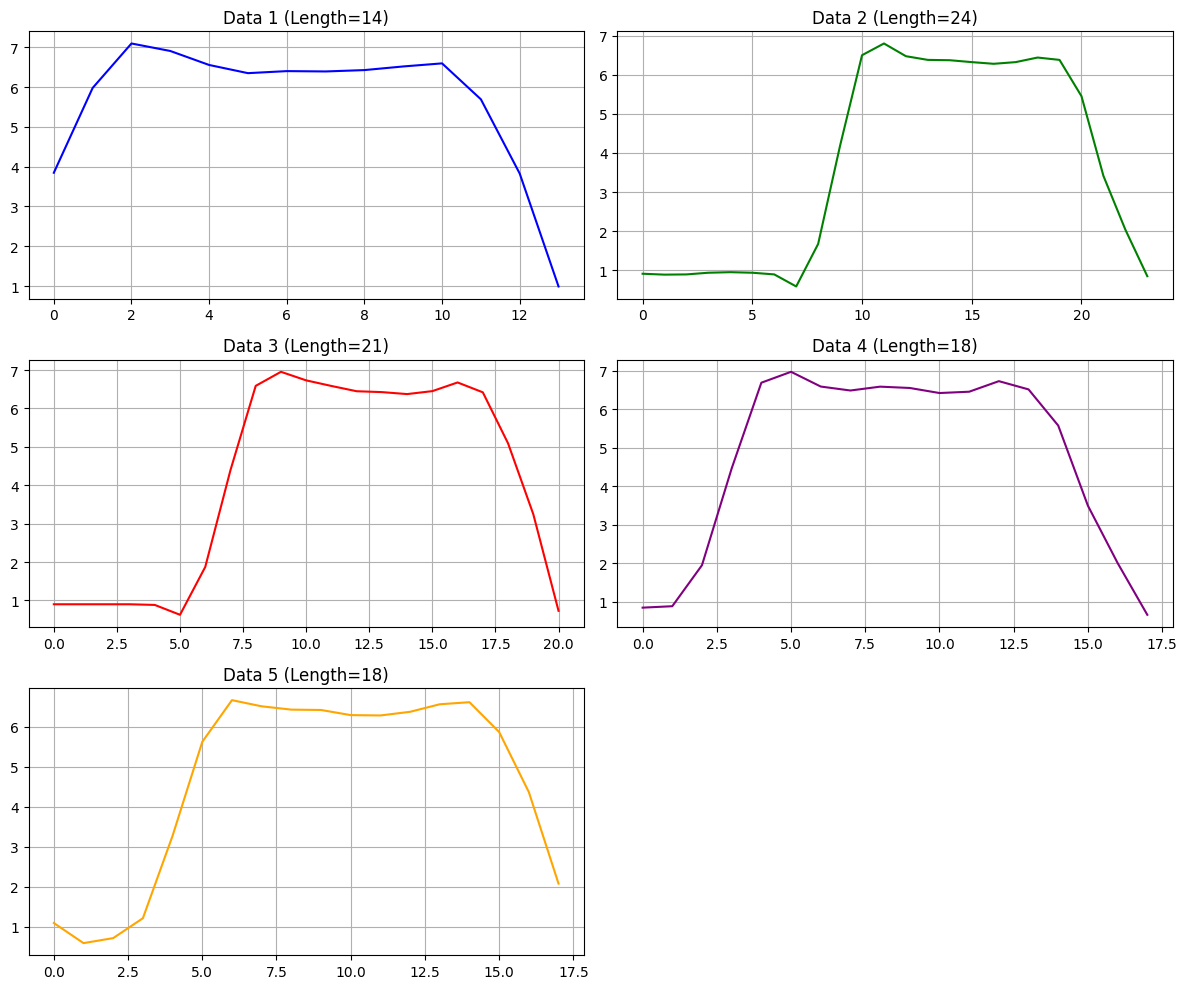

In [13]:
x_axis1 = range(len(algo2_1))
x_axis2 = range(len(algo2_2))
x_axis3 = range(len(algo2_3))
x_axis4 = range(len(algo2_4))
x_axis5 = range(len(algo2_5))

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(x_axis1, algo2_1, color='blue')
plt.title(f"Data 1 (Length={len(algo2_1)})")
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(x_axis2, algo2_2, color='green')
plt.title(f"Data 2 (Length={len(algo2_2)})")
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(x_axis3, algo2_3, color='red')
plt.title(f"Data 3 (Length={len(algo2_3)})")
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(x_axis4, algo2_4, color='purple')
plt.title(f"Data 4 (Length={len(algo2_4)})")
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(x_axis5, algo2_5, color='orange')
plt.title(f"Data 5 (Length={len(algo2_5)})")
plt.grid(True)

plt.tight_layout()
plt.show()

## Algorithm 3

In [14]:
algo3_1 = savitzky_golay_filter(moving_average_filter(data1))
algo3_2 = savitzky_golay_filter(moving_average_filter(data2))
algo3_3 = savitzky_golay_filter(moving_average_filter(data3))
algo3_4 = savitzky_golay_filter(moving_average_filter(data4))
algo3_5 = savitzky_golay_filter(moving_average_filter(data5))
algo3_6 = savitzky_golay_filter(moving_average_filter(data6))
algo3_7 = savitzky_golay_filter(moving_average_filter(data7))
algo3_8 = savitzky_golay_filter(moving_average_filter(data8))
algo3_9 = savitzky_golay_filter(moving_average_filter(data9))
algo3_10 = savitzky_golay_filter(moving_average_filter(data10))
algo3_11 = savitzky_golay_filter(moving_average_filter(data11))
algo3_12 = savitzky_golay_filter(moving_average_filter(data12))
algo3_13 = savitzky_golay_filter(moving_average_filter(data13))
algo3_14 = savitzky_golay_filter(moving_average_filter(data14))
algo3_15 = savitzky_golay_filter(moving_average_filter(data15))
algo3_16 = savitzky_golay_filter(moving_average_filter(data16))
algo3_17 = savitzky_golay_filter(moving_average_filter(data17))
algo3_18 = savitzky_golay_filter(moving_average_filter(data18))
algo3_19 = savitzky_golay_filter(moving_average_filter(data19))
algo3_20 = savitzky_golay_filter(moving_average_filter(data20))
algo3_21 = savitzky_golay_filter(moving_average_filter(data21))
algo3_22 = savitzky_golay_filter(moving_average_filter(data22))
algo3_23 = savitzky_golay_filter(moving_average_filter(data23))
algo3_24 = savitzky_golay_filter(moving_average_filter(data24))
algo3_25 = savitzky_golay_filter(moving_average_filter(data25))
algo3_26 = savitzky_golay_filter(moving_average_filter(data26))
algo3_27 = savitzky_golay_filter(moving_average_filter(data27))
algo3_28 = savitzky_golay_filter(moving_average_filter(data28))
algo3_29 = savitzky_golay_filter(moving_average_filter(data29))
algo3_30 = savitzky_golay_filter(moving_average_filter(data30))
print(algo3_1)

[4.897142857142856, 5.938095238095238, 6.569523809523806, 6.842857142857138, 6.578095238095234, 6.398095238095235, 6.346666666666664, 6.363809523809521, 6.434285714285711, 6.561904761904759, 6.376190476190473, 5.299047619047617, 3.9361904761904736, 2.120952380952378]


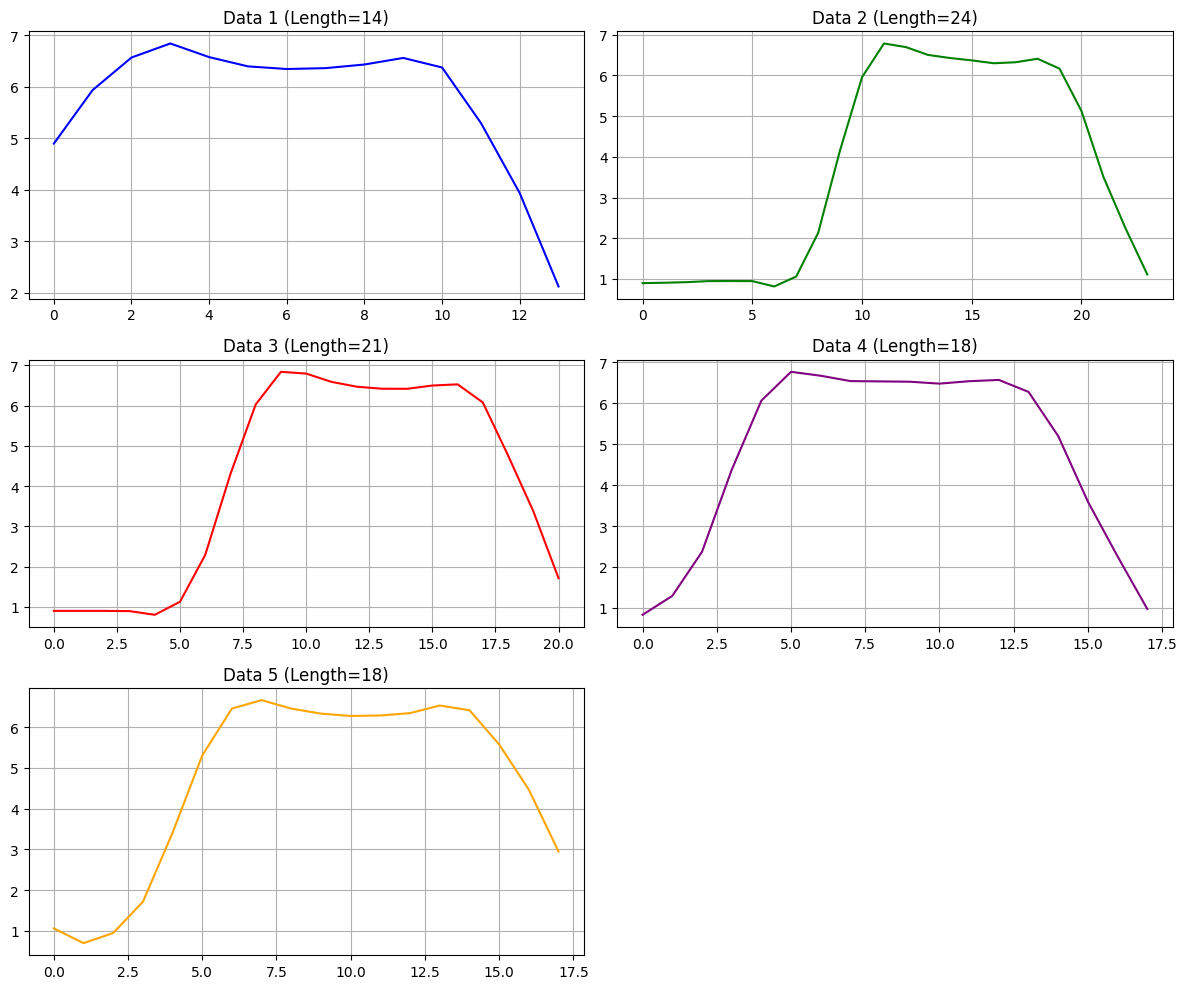

In [15]:
x_axis1 = range(len(algo3_1))
x_axis2 = range(len(algo3_2))
x_axis3 = range(len(algo3_3))
x_axis4 = range(len(algo3_4))
x_axis5 = range(len(algo3_5))

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(x_axis1, algo3_1, color='blue')
plt.title(f"Data 1 (Length={len(algo3_1)})")
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(x_axis2, algo3_2, color='green')
plt.title(f"Data 2 (Length={len(algo3_2)})")
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(x_axis3, algo3_3, color='red')
plt.title(f"Data 3 (Length={len(algo3_3)})")
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(x_axis4, algo3_4, color='purple')
plt.title(f"Data 4 (Length={len(algo3_4)})")
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(x_axis5, algo3_5, color='orange')
plt.title(f"Data 5 (Length={len(algo3_5)})")
plt.grid(True)

plt.tight_layout()
plt.show()

## Algorithm 4

In [16]:
algo4_1 = savitzky_golay_filter(manual_filter(data1))
algo4_2 = savitzky_golay_filter(manual_filter(data2))
algo4_3 = savitzky_golay_filter(manual_filter(data3))
algo4_4 = savitzky_golay_filter(manual_filter(data4))
algo4_5 = savitzky_golay_filter(manual_filter(data5))
algo4_6 = savitzky_golay_filter(manual_filter(data6))
algo4_7 = savitzky_golay_filter(manual_filter(data7))
algo4_8 = savitzky_golay_filter(manual_filter(data8))
algo4_9 = savitzky_golay_filter(manual_filter(data9))
algo4_10 = savitzky_golay_filter(manual_filter(data10))
algo4_11 = savitzky_golay_filter(manual_filter(data11))
algo4_12 = savitzky_golay_filter(manual_filter(data12))
algo4_13 = savitzky_golay_filter(manual_filter(data13))
algo4_14 = savitzky_golay_filter(manual_filter(data14))
algo4_15 = savitzky_golay_filter(manual_filter(data15))
algo4_16 = savitzky_golay_filter(manual_filter(data16))
algo4_17 = savitzky_golay_filter(manual_filter(data17))
algo4_18 = savitzky_golay_filter(manual_filter(data18))
algo4_19 = savitzky_golay_filter(manual_filter(data19))
algo4_20 = savitzky_golay_filter(manual_filter(data20))
algo4_21 = savitzky_golay_filter(manual_filter(data21))
algo4_22 = savitzky_golay_filter(manual_filter(data22))
algo4_23 = savitzky_golay_filter(manual_filter(data23))
algo4_24 = savitzky_golay_filter(manual_filter(data24))
algo4_25 = savitzky_golay_filter(manual_filter(data25))
algo4_26 = savitzky_golay_filter(manual_filter(data26))
algo4_27 = savitzky_golay_filter(manual_filter(data27))
algo4_28 = savitzky_golay_filter(manual_filter(data28))
algo4_29 = savitzky_golay_filter(manual_filter(data29))
algo4_30 = savitzky_golay_filter(manual_filter(data30))
print(algo4_1)

Error S-G Filter: If mode is 'interp', window_length must be less than or equal to the size of x.. กรุณาตรวจสอบค่า window_length และ polyorder
Error S-G Filter: If mode is 'interp', window_length must be less than or equal to the size of x.. กรุณาตรวจสอบค่า window_length และ polyorder
Error S-G Filter: If mode is 'interp', window_length must be less than or equal to the size of x.. กรุณาตรวจสอบค่า window_length และ polyorder
Error S-G Filter: If mode is 'interp', window_length must be less than or equal to the size of x.. กรุณาตรวจสอบค่า window_length และ polyorder
Error S-G Filter: If mode is 'interp', window_length must be less than or equal to the size of x.. กรุณาตรวจสอบค่า window_length และ polyorder
Error S-G Filter: If mode is 'interp', window_length must be less than or equal to the size of x.. กรุณาตรวจสอบค่า window_length และ polyorder
Error S-G Filter: If mode is 'interp', window_length must be less than or equal to the size of x.. กรุณาตรวจสอบค่า window_length และ polyorder

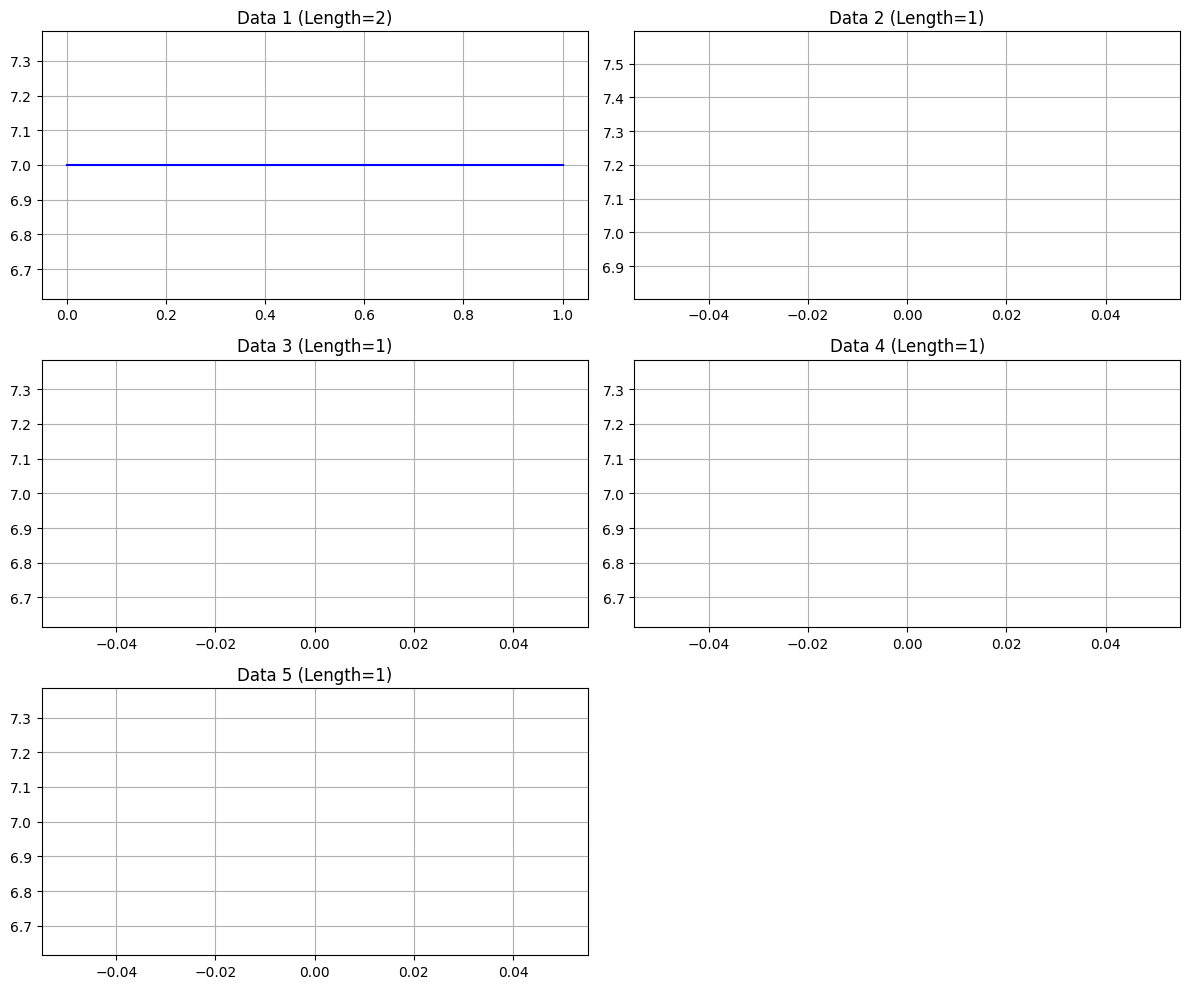

In [17]:
x_axis1 = range(len(algo4_1))
x_axis2 = range(len(algo4_2))
x_axis3 = range(len(algo4_3))
x_axis4 = range(len(algo4_4))
x_axis5 = range(len(algo4_5))

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(x_axis1, algo4_1, color='blue')
plt.title(f"Data 1 (Length={len(algo4_1)})")
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(x_axis2, algo4_2, color='green')
plt.title(f"Data 2 (Length={len(algo4_2)})")
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(x_axis3, algo4_3, color='red')
plt.title(f"Data 3 (Length={len(algo4_3)})")
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(x_axis4, algo4_4, color='purple')
plt.title(f"Data 4 (Length={len(algo4_4)})")
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(x_axis5, algo4_5, color='orange')
plt.title(f"Data 5 (Length={len(algo4_5)})")
plt.grid(True)

plt.tight_layout()
plt.show()

## Algorithm 5

In [18]:
algo5_1 = hampel_filter(data1)
algo5_2 = hampel_filter(data2)
algo5_3 = hampel_filter(data3)
algo5_4 = hampel_filter(data4)
algo5_5 = hampel_filter(data5)
algo5_6 = hampel_filter(data6)
algo5_7 = hampel_filter(data7)
algo5_8 = hampel_filter(data8)
algo5_9 = hampel_filter(data9)
algo5_10 = hampel_filter(data10)
algo5_11 = hampel_filter(data11)
algo5_12 = hampel_filter(data12)
algo5_13 = hampel_filter(data13)
algo5_14 = hampel_filter(data14)
algo5_15 = hampel_filter(data15)
algo5_16 = hampel_filter(data16)
algo5_17 = hampel_filter(data17)
algo5_18 = hampel_filter(data18)
algo5_19 = hampel_filter(data19)
algo5_20 = hampel_filter(data20)
algo5_21 = hampel_filter(data21)
algo5_22 = hampel_filter(data22)
algo5_23 = hampel_filter(data23)
algo5_24 = hampel_filter(data24)
algo5_25 = hampel_filter(data25)
algo5_26 = hampel_filter(data26)
algo5_27 = hampel_filter(data27)
algo5_28 = hampel_filter(data28)
algo5_29 = hampel_filter(data29)
algo5_30 = hampel_filter(data30)
print(algo5_1)

[3.7, 6.3, 7.0, 7.0, 6.4, 6.4, 6.4, 6.4, 6.3, 6.5, 6.3, 6.0, 3.5, 1.1]


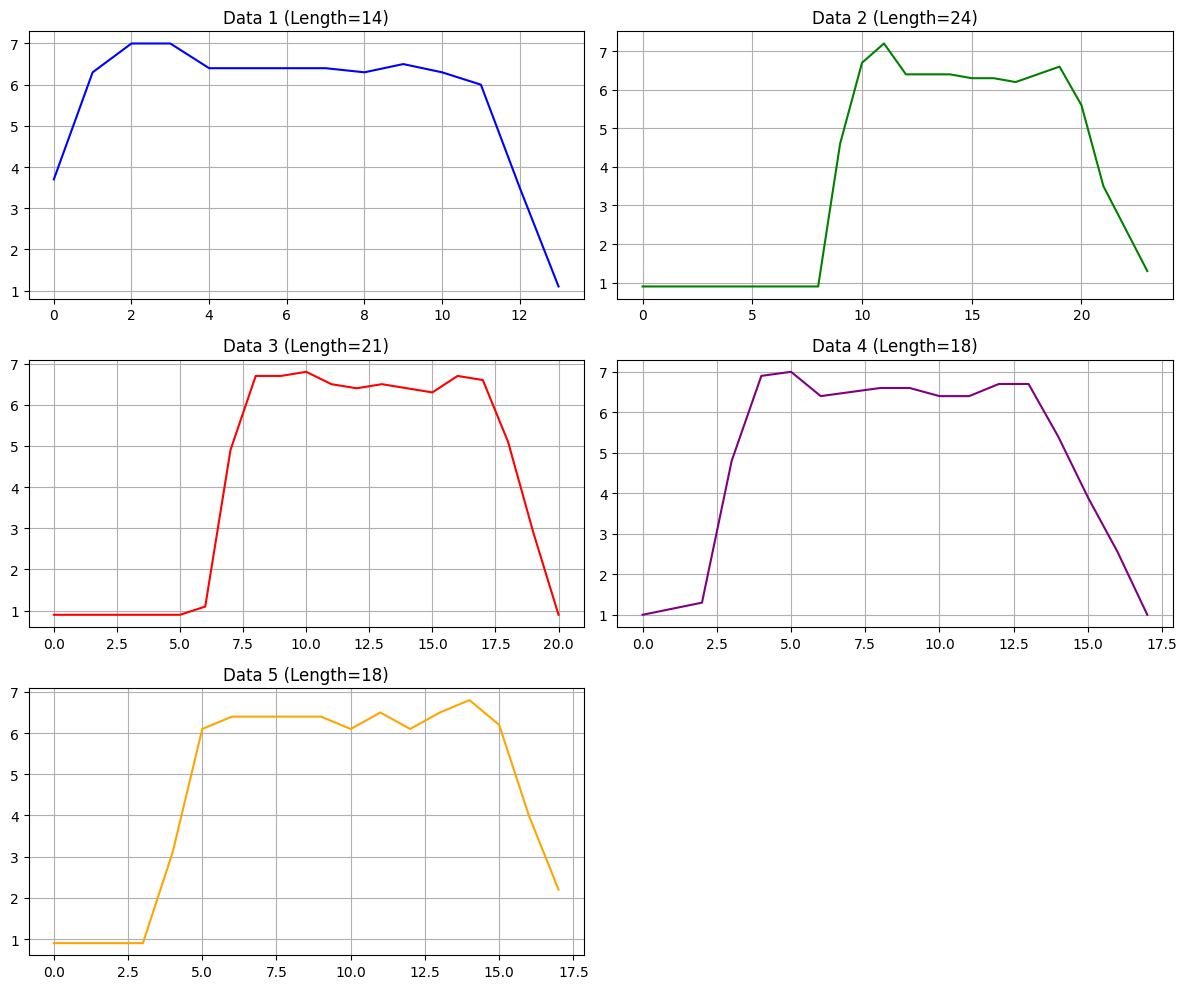

In [19]:
x_axis1 = range(len(algo5_1))
x_axis2 = range(len(algo5_2))
x_axis3 = range(len(algo5_3))
x_axis4 = range(len(algo5_4))
x_axis5 = range(len(algo5_5))

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(x_axis1, algo5_1, color='blue')
plt.title(f"Data 1 (Length={len(algo5_1)})")
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(x_axis2, algo5_2, color='green')
plt.title(f"Data 2 (Length={len(algo5_2)})")
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(x_axis3, algo5_3, color='red')
plt.title(f"Data 3 (Length={len(algo5_3)})")
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(x_axis4, algo5_4, color='purple')
plt.title(f"Data 4 (Length={len(algo5_4)})")
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(x_axis5, algo5_5, color='orange')
plt.title(f"Data 5 (Length={len(algo5_5)})")
plt.grid(True)

plt.tight_layout()
plt.show()

## Algorithm 6

In [20]:
algo6_1 = median_filter(data1)
algo6_2 = median_filter(data2)
algo6_3 = median_filter(data3)
algo6_4 = median_filter(data4)
algo6_5 = median_filter(data5)
algo6_6 = median_filter(data6)
algo6_7 = median_filter(data7)
algo6_8 = median_filter(data8)
algo6_9 = median_filter(data9)
algo6_10 = median_filter(data10)
algo6_11 = median_filter(data11)
algo6_12 = median_filter(data12)
algo6_13 = median_filter(data13)
algo6_14 = median_filter(data14)
algo6_15 = median_filter(data15)
algo6_16 = median_filter(data16)
algo6_17 = median_filter(data17)
algo6_18 = median_filter(data18)
algo6_19 = median_filter(data19)
algo6_20 = median_filter(data20)
algo6_21 = median_filter(data21)
algo6_22 = median_filter(data22)
algo6_23 = median_filter(data23)
algo6_24 = median_filter(data24)
algo6_25 = median_filter(data25)
algo6_26 = median_filter(data26)
algo6_27 = median_filter(data27)
algo6_28 = median_filter(data28)
algo6_29 = median_filter(data29)
algo6_30 = median_filter(data30)
print(algo6_1)

[3.7, 6.3, 7.0, 7.0, 6.4, 6.4, 6.4, 6.4, 6.4, 6.5, 6.5, 6.0, 3.5, 1.1]


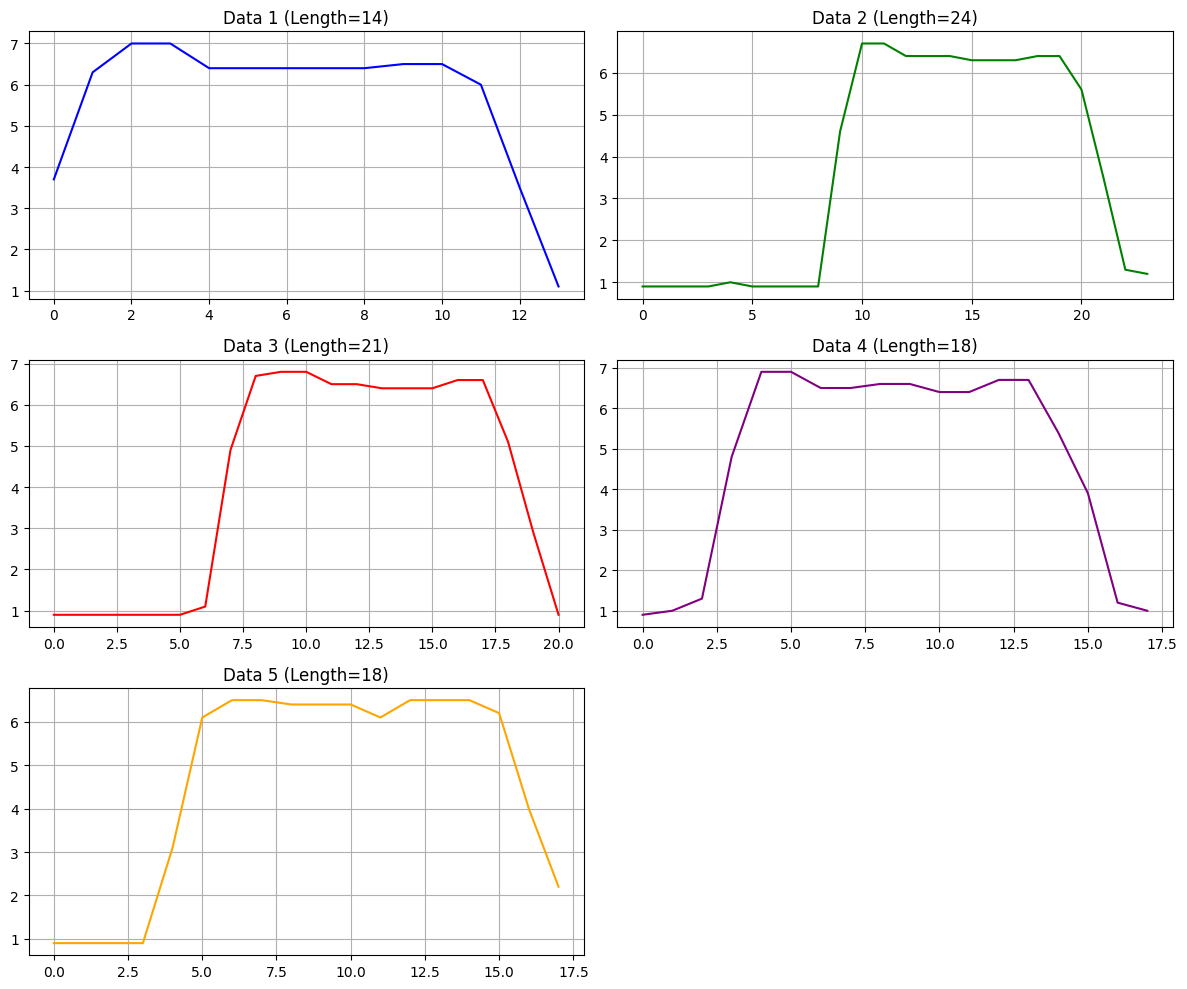

In [21]:
x_axis1 = range(len(algo6_1))
x_axis2 = range(len(algo6_2))
x_axis3 = range(len(algo6_3))
x_axis4 = range(len(algo6_4))
x_axis5 = range(len(algo6_5))

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(x_axis1, algo6_1, color='blue')
plt.title(f"Data 1 (Length={len(algo6_1)})")
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(x_axis2, algo6_2, color='green')
plt.title(f"Data 2 (Length={len(algo6_2)})")
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(x_axis3, algo6_3, color='red')
plt.title(f"Data 3 (Length={len(algo6_3)})")
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(x_axis4, algo6_4, color='purple')
plt.title(f"Data 4 (Length={len(algo6_4)})")
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(x_axis5, algo6_5, color='orange')
plt.title(f"Data 5 (Length={len(algo6_5)})")
plt.grid(True)

plt.tight_layout()
plt.show()

## Algorithm 7

In [22]:
algo7_1 = moving_average_filter(data1)
algo7_2 = moving_average_filter(data2)
algo7_3 = moving_average_filter(data3)
algo7_4 = moving_average_filter(data4)
algo7_5 = moving_average_filter(data5)
algo7_6 = moving_average_filter(data6)
algo7_7 = moving_average_filter(data7)
algo7_8 = moving_average_filter(data8)
algo7_9 = moving_average_filter(data9)
algo7_10 = moving_average_filter(data10)
algo7_11 = moving_average_filter(data11)
algo7_12 = moving_average_filter(data12)
algo7_13 = moving_average_filter(data13)
algo7_14 = moving_average_filter(data14)
algo7_15 = moving_average_filter(data15)
algo7_16 = moving_average_filter(data16)
algo7_17 = moving_average_filter(data17)
algo7_18 = moving_average_filter(data18)
algo7_19 = moving_average_filter(data19)
algo7_20 = moving_average_filter(data20)
algo7_21 = moving_average_filter(data21)
algo7_22 = moving_average_filter(data22)
algo7_23 = moving_average_filter(data23)
algo7_24 = moving_average_filter(data24)
algo7_25 = moving_average_filter(data25)
algo7_26 = moving_average_filter(data26)
algo7_27 = moving_average_filter(data27)
algo7_28 = moving_average_filter(data28)
algo7_29 = moving_average_filter(data29)
algo7_30 = moving_average_filter(data30)
print(algo7_1)

[5.0, 5.666666666666667, 6.766666666666667, 6.8, 6.566666666666666, 6.366666666666667, 6.366666666666667, 6.366666666666667, 6.400000000000001, 6.533333333333332, 6.433333333333334, 5.433333333333334, 3.533333333333333, 2.3000000000000003]


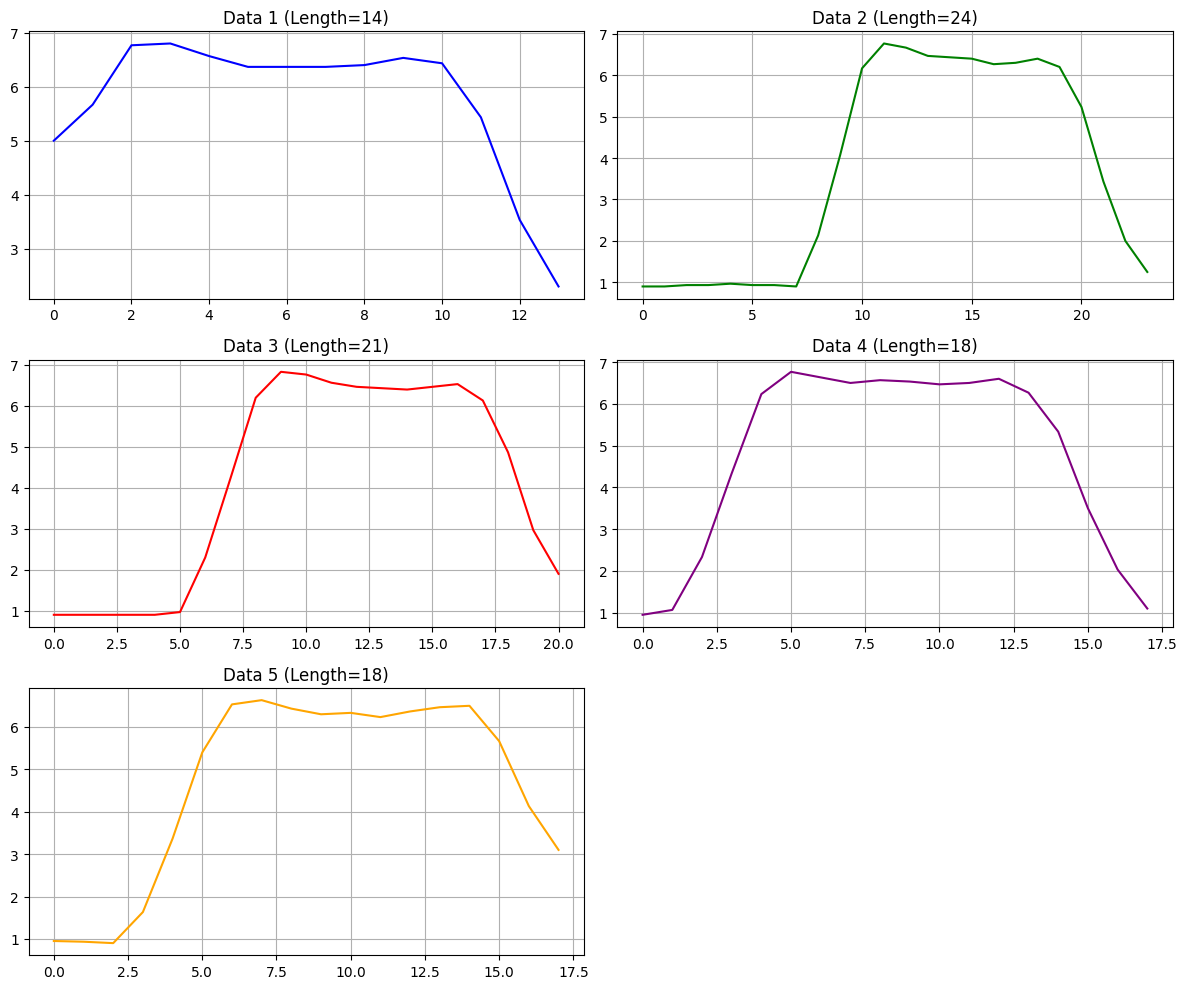

In [23]:
x_axis1 = range(len(algo7_1))
x_axis2 = range(len(algo7_2))
x_axis3 = range(len(algo7_3))
x_axis4 = range(len(algo7_4))
x_axis5 = range(len(algo7_5))

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(x_axis1, algo7_1, color='blue')
plt.title(f"Data 1 (Length={len(algo7_1)})")
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(x_axis2, algo7_2, color='green')
plt.title(f"Data 2 (Length={len(algo7_2)})")
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(x_axis3, algo7_3, color='red')
plt.title(f"Data 3 (Length={len(algo7_3)})")
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(x_axis4, algo7_4, color='purple')
plt.title(f"Data 4 (Length={len(algo7_4)})")
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(x_axis5, algo7_5, color='orange')
plt.title(f"Data 5 (Length={len(algo7_5)})")
plt.grid(True)

plt.tight_layout()
plt.show()

# **Measure**

## Function

In [24]:
Number = Union[int, float]

def get_percentile_value(data_list: List[Number], 
                         percentile: float = 95.0) -> float:
    if not data_list:
        return float('nan')
    value = np.percentile(np.array(data_list), percentile)
    return float(value)
def get_avg_above_percentile(data_list: List[Number], 
                             percentile: float = 95.0) -> float:
    if not data_list:
        return float('nan')
    data_array = np.array(data_list)
    threshold_value = np.percentile(data_array, percentile)
    top_values = data_array[data_array > threshold_value]
    if top_values.size == 0:
        return float('nan')
    average_of_top = np.mean(top_values)
    return float(average_of_top)

## Algorithm  (cm.)

In [25]:
data_algo1 = [algo1_1, algo1_2, algo1_3, algo1_4, algo1_5, algo1_6, algo1_7, algo1_8, algo1_9, algo1_10, algo1_11, algo1_12, algo1_13, algo1_14, algo1_15, algo1_16, algo1_17, algo1_18, algo1_19, algo1_20, algo1_21, algo1_22, algo1_23, algo1_24, algo1_25, algo1_26, algo1_27, algo1_28, algo1_29, algo1_30]
data_algo2 = [algo2_1, algo2_2, algo2_3, algo2_4, algo2_5, algo2_6, algo2_7, algo2_8, algo2_9, algo2_10, algo2_11, algo2_12, algo2_13, algo2_14, algo2_15, algo2_16, algo2_17, algo2_18, algo2_19, algo2_20, algo2_21, algo2_22, algo2_23, algo2_24, algo2_25, algo2_26, algo2_27, algo2_28, algo2_29, algo2_30]
data_algo3 = [algo3_1, algo3_2, algo3_3, algo3_4, algo3_5, algo3_6, algo3_7, algo3_8, algo3_9, algo3_10, algo3_11, algo3_12, algo3_13, algo3_14, algo3_15, algo3_16, algo3_17, algo3_18, algo3_19, algo3_20, algo3_21, algo3_22, algo3_23, algo3_24, algo3_25, algo3_26, algo3_27, algo3_28, algo3_29, algo3_30]
data_algo4 = [algo4_1, algo4_2, algo4_3, algo4_4, algo4_5, algo4_6, algo4_7, algo4_8, algo4_9, algo4_10, algo4_11, algo4_12, algo4_13, algo4_14, algo4_15, algo4_16, algo4_17, algo4_18, algo4_19, algo4_20, algo4_21, algo4_22, algo4_23, algo4_24, algo4_25, algo4_26, algo4_27, algo4_28, algo4_29, algo4_30]
data_algo5 = [algo5_1, algo5_2, algo5_3, algo5_4, algo5_5, algo5_6, algo5_7, algo5_8, algo5_9, algo5_10, algo5_11, algo5_12, algo5_13, algo5_14, algo5_15, algo5_16, algo5_17, algo5_18, algo5_19, algo5_20, algo5_21, algo5_22, algo5_23, algo5_24, algo5_25, algo5_26, algo5_27, algo5_28, algo5_29, algo5_30]
data_algo6 = [algo6_1, algo6_2, algo6_3, algo6_4, algo6_5, algo6_6, algo6_7, algo6_8, algo6_9, algo6_10, algo6_11, algo6_12, algo6_13, algo6_14, algo6_15, algo6_16, algo6_17, algo6_18, algo6_19, algo6_20, algo6_21, algo6_22, algo6_23, algo6_24, algo6_25, algo6_26, algo6_27, algo6_28, algo6_29, algo6_30]
data_algo7 = [algo7_1, algo7_2, algo7_3, algo7_4, algo7_5, algo7_6, algo7_7, algo7_8, algo7_9, algo7_10, algo7_11, algo7_12, algo7_13, algo7_14, algo7_15, algo7_16, algo7_17, algo7_18, algo7_19, algo7_20, algo7_21, algo7_22, algo7_23, algo7_24, algo7_25, algo7_26, algo7_27, algo7_28, algo7_29, algo7_30]
all_data = [
    data_algo1, data_algo2, data_algo3, data_algo4, 
    data_algo5, data_algo6, data_algo7
]
list_p95 = []
list_avg_above_p95 = []
list_max = []
list_avg = []
for i in range(len(all_data)):
    print(f"Algorithm Set {i+1}:")
    for idx, data in enumerate(all_data[i], start=1):
        p95_value = get_percentile_value(data, 95.0)
        avg_above_p95 = get_avg_above_percentile(data, 95.0)
        avg = np.mean(data) if data else float('nan')
        mx = max(data) if data else float('nan')
        list_p95.append(p95_value)
        list_avg_above_p95.append(avg_above_p95)
        list_max.append(mx)
        list_avg.append(avg)
        print(f"  Data {idx}: P95 = {p95_value:.2f}, Avg > P95 = {avg_above_p95:.2f}, Max = {mx:.2f}, Avg = {avg:.2f}")

Algorithm Set 1:
  Data 1: P95 = 6.97, Avg > P95 = 7.09, Max = 7.09, Avg = 5.66
  Data 2: P95 = 6.67, Avg > P95 = 6.86, Max = 7.05, Avg = 3.77
  Data 3: P95 = 6.71, Avg > P95 = 6.91, Max = 6.91, Avg = 4.09
  Data 4: P95 = 6.78, Avg > P95 = 6.99, Max = 6.99, Avg = 4.85
  Data 5: P95 = 6.61, Avg > P95 = 6.79, Max = 6.79, Avg = 4.60
  Data 6: P95 = 6.67, Avg > P95 = 6.91, Max = 6.91, Avg = 4.67
  Data 7: P95 = 6.75, Avg > P95 = 6.77, Max = 6.77, Avg = 4.92
  Data 8: P95 = 6.48, Avg > P95 = 6.57, Max = 6.57, Avg = 4.06
  Data 9: P95 = 6.69, Avg > P95 = 6.72, Max = 6.74, Avg = 3.73
  Data 10: P95 = 6.74, Avg > P95 = 6.88, Max = 6.88, Avg = 4.86
  Data 11: P95 = 6.88, Avg > P95 = 6.93, Max = 6.93, Avg = 4.26
  Data 12: P95 = 6.70, Avg > P95 = 6.99, Max = 6.99, Avg = 4.63
  Data 13: P95 = 6.63, Avg > P95 = 6.84, Max = 6.84, Avg = 4.28
  Data 14: P95 = 6.57, Avg > P95 = 6.72, Max = 6.83, Avg = 3.38
  Data 15: P95 = 6.67, Avg > P95 = 6.77, Max = 6.77, Avg = 4.42
  Data 16: P95 = 6.66, Avg > P95

In [26]:
for i in range(7):
    print(f"Algorithm Set {i+1}:")
    for j in range(30):
        index = i * 30 + j
        print(f"{list_p95[index]:.2f}",end="    ")
    print()
    for j in range(30):
        index = i * 30 + j
        print(f"{list_max[index]:.2f}",end="    ")
    print()
    for j in range(30):
        index = i * 30 + j
        print(f"{list_avg[index]:.2f}",end="    ")
    print()

Algorithm Set 1:
6.97    6.67    6.71    6.78    6.61    6.67    6.75    6.48    6.69    6.74    6.88    6.70    6.63    6.57    6.67    6.66    6.59    6.64    6.63    6.87    6.56    6.61    6.66    6.75    6.71    6.84    6.48    6.71    6.57    6.40    
7.09    7.05    6.91    6.99    6.79    6.91    6.77    6.57    6.74    6.88    6.93    6.99    6.84    6.83    6.77    6.67    6.65    6.65    6.79    6.90    6.66    6.67    6.67    7.03    6.77    6.89    6.70    6.74    6.77    6.47    
5.66    3.77    4.09    4.85    4.60    4.67    4.92    4.06    3.73    4.86    4.26    4.63    4.28    3.38    4.42    3.95    4.27    4.33    3.43    4.71    3.93    4.88    4.89    3.96    4.51    5.02    3.66    3.70    4.01    3.53    
Algorithm Set 2:
6.97    6.50    6.73    6.77    6.62    6.67    7.17    6.93    6.75    6.78    6.87    6.65    6.78    6.88    6.85    6.59    6.79    6.86    6.62    6.87    6.62    7.07    6.84    6.81    6.89    6.83    6.50    6.78    6.70    6.78    
7.

## Inaccurate  (%)

In [27]:
for i in range(7):
    # print(f"Algorithm Set {i+1}:")
    inacc_p95 = 0.0
    inacc_max = 0.0
    inacc_avg = 0.0
    for j in range(30):
        index = i * 30 + j
        inacc_p95 += abs(list_p95[index] - 7.37125)/7.37125
        inacc_max += abs(list_max[index] - 7.37125)/7.37125
        inacc_avg += abs(list_avg[index] - 7.37125)/7.37125
    inacc_p95 /= 30.0
    inacc_max /= 30.0
    inacc_avg /= 30.0
    print(f"{inacc_p95:.4f}\n{inacc_max:.4f}\n{inacc_avg:.4f}")
    

0.0946
0.0771
0.4169
0.0800
0.0612
0.4164
0.0927
0.0762
0.4115
nan
nan
nan
0.0951
0.0775
0.4169
0.0744
0.0730
0.4165
0.0933
0.0795
0.4119


## CV

In [28]:
Number = Union[int, float]
def calculate_cv_percent(data_list: List[Number]) -> float:
    if len(data_list) < 2:
        return float('nan')
    data_array = np.array(data_list)
    #print(data_array)
    avg = np.mean(data_array)
    std_dev = np.std(data_array, ddof=1)
    if avg == 0:
        return float('nan')
    cv_percent = (std_dev / avg)
    return float(abs(cv_percent))

In [29]:
for i in range(7):
    # print(f"Algorithm Set {i+1}:")
    list_inacc_p95 = []
    list_inacc_max = []
    list_inacc_avg = []
    for j in range(30):
        index = i * 30 + j
        list_inacc_p95.append(list_p95[index])
        list_inacc_max.append(list_max[index])
        list_inacc_avg.append(list_avg[index])
    print(f"{calculate_cv_percent(list_inacc_p95):.4f}\n{calculate_cv_percent(list_inacc_max):.4f}\n{calculate_cv_percent(list_inacc_avg):.4f}")
    

0.0185
0.0219
0.1278
0.0223
0.0171
0.1275
0.0121
0.0120
0.1286
nan
nan
nan
0.0214
0.0241
0.1284
0.0231
0.0228
0.1281
0.0128
0.0123
0.1286
